# Quantum Mechanics

In [ ]:
## We will look at various aspects of solving time-dependant Schrodinger equation in finite dimensional Hil

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.linalg import expm, sinm, cosm

## 1. Constant Diagonal Hamiltonians

In [2]:
ω = 1
δ = 0
H=np.array([[ω,δ],[δ,-ω]])
print(H)

[[ 1  0]
 [ 0 -1]]


In [3]:
σ_x=np.array([[0,1],[1,0]])
σ_y=np.array([[0,-1j],[1j,0]])
σ_z=np.array([[1,0],[0,-1]])

In [4]:
t_list = np.linspace(0,10,100)

In [5]:
U = [expm(-(1j)*t*H) for t in t_list]

In [6]:
v=np.array([1,1])/np.sqrt(2)

In [7]:
len(U)

100

In [8]:
expec_gs=np.zeros(len(U))
for i in range(len(U)):
    expec_gs[i]=np.real(v.T.conj().dot(U[i].dot(v)))


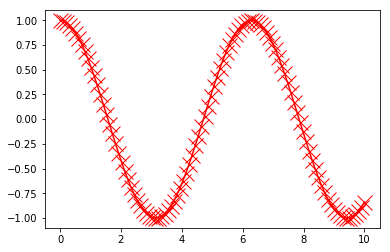

In [9]:
plt.plot(t_list,expec_gs,'rx-',markersize=15)

## Constant Hamiltonians with finite detuning

In [10]:
ω = 1
δ = 1
H=np.array([[ω,δ],[δ,-ω]])
np.linalg.eig(H)[0]

array([ 1.41421356, -1.41421356])

In [11]:
np.sqrt(ω**2+δ**2)

1.4142135623730951

In [12]:
U = [expm(-(1j)*t*H) for t in t_list]

In [13]:
v=np.array([0,1])

In [14]:
expec_gs=np.zeros(len(U))
for i in range(len(U)):
    expec_gs[i]=np.real(v.T.conj().dot(U[i].dot(v)))


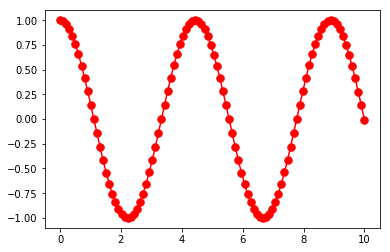

In [15]:
plt.plot(t_list,expec_gs,'r.-',markersize=15)

## Two Qubits

Partial trace is complicated, so lets first do things with kron.

In [16]:
H2=np.kron(σ_x,σ_x)

In [17]:
H2

array([[0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 0]])

In [18]:
U = [expm(-(1j)*t*H2) for t in t_list]

In [19]:
down=np.array([0,1])
up=np.array([1,0])
v2=(np.kron(down,down)+np.kron(up,up))/np.sqrt(2)
v2

array([ 0.70710678,  0.        ,  0.        ,  0.70710678])

In [20]:
expec_gs=np.zeros(len(U))
for i in range(len(U)):
    expec_gs[i]=np.real(v2.T.conj().dot(U[i].dot(v2)))


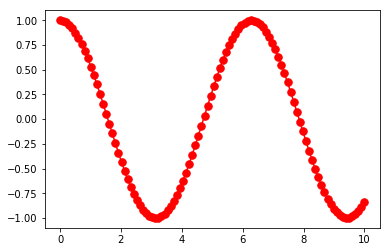

In [21]:
plt.plot(t_list,expec_gs,'r.-',markersize=15)

# Operator Expectation Values

In [22]:
Sx=np.kron(σ_x,np.eye(2))

In [23]:
Sx

array([[ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.],
       [ 1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.]])

In [24]:
expec_gs=np.zeros(len(U))
for i in range(len(U)):
    v2p = U[i].dot(v2)
    expec_gs[i]=np.real(v2p.T.conj().dot(Sx.dot(v2p)))


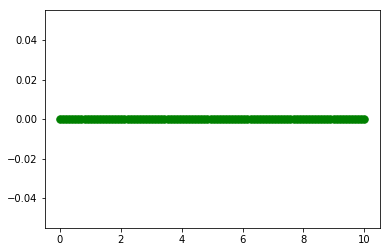

In [25]:
plt.plot(t_list,expec_gs,'g.-',markersize=15)

In [26]:
expec_gs

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

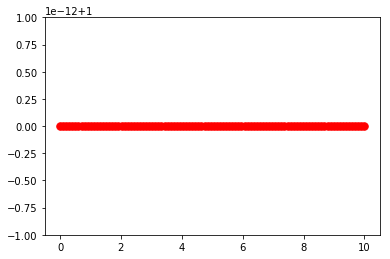

In [27]:
A=np.kron(σ_x,σ_x)
expec_gs=np.zeros(len(U))
for i in range(len(U)):
    v2p = U[i].dot(v2)
    expec_gs[i]=np.real(v2p.T.conj().dot(A.dot(v2p)))
    
plt.plot(t_list,expec_gs,'r.-',markersize=15)

# Time Dependant Hamiltonians

In [28]:
def Time_Dependant_Hamiltonian(ω,δ,t,H_0,μ):
    H = ω*H_0+np.cos(δ*t)*μ # Time dependant driving field with constant diagonal Hamiltonian
    return H

In [29]:
ω,δ,t=1,0,2
H_0=σ_z
μ=σ_x
t_list = np.linspace(0,10,10**4)

In [30]:
print(Time_Dependant_Hamiltonian(ω,δ,t,H_0,μ))

[[ 1.  1.]
 [ 1. -1.]]


In [31]:
H=[Time_Dependant_Hamiltonian(ω,δ,t,H_0,μ) for t in t_list]

In [32]:
U = [expm(-(1j)*t_list[i]*H[i]) for i in range(len(t_list))]

In [33]:
v=np.array([1,1])/np.sqrt(2)

In [34]:
expec_gs=np.zeros(len(U))
for i in range(len(U)):
    expec_gs[i]=np.real(v.T.conj().dot(U[i].dot(v)))

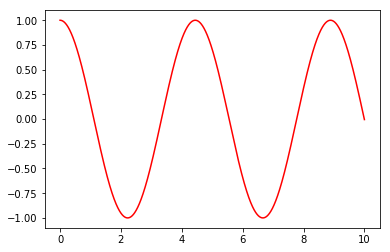

In [35]:
plt.plot(t_list,expec_gs,'r-',markersize=15)

# Jaynes Cummings Model

In [36]:
def annihilation(Dim):
    a=np.zeros((Dim,Dim))
    for i in range(Dim-1):
        a[i,i+1]=np.sqrt(i+1) # Note that since indexing in python starts with zero, you need the i " +! " 
    return a

In [37]:
a=annihilation(5)
n=a.T.conj().dot(a)
print(n)

[[ 0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  0.  2.  0.  0.]
 [ 0.  0.  0.  3.  0.]
 [ 0.  0.  0.  0.  4.]]


In [38]:
ω=1
Ω=0.5
g=0.2
Dim=5
a=annihilation(Dim)
n=a.T.conj().dot(a)
σ_p=(σ_x+1j*σ_y)/2
σ_m=(σ_x-1j*σ_y)/2
H = ω*np.kron(σ_z,np.eye(Dim)) + Ω*np.kron(np.eye(2),n)+g*(np.kron(σ_p,a)+np.kron(σ_m,a.T.conj()))
print(H-H.T.conj())

[[ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j
   0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j
   0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j
   0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j
   0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j
   0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j
   0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j
   0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j
   0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j
   0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j
   0.+0.j]]


In [77]:
t_list=np.linspace(0,10,100)
U = [expm(-(1j)*t*H) for t in t_list]

In [78]:
v_spin=down
v_ho=np.zeros(Dim)
v_ho[-1]=1
v2=np.kron(v_spin,v_ho)
U[0].dot(v2)

array([ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
        0.+0.j,  0.+0.j,  1.+0.j])

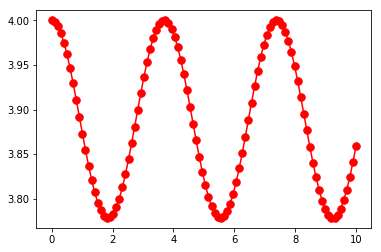

In [79]:
A=np.kron(np.eye(2),n)
expec_gs=np.zeros(len(U))
for i in range(len(U)):
    v2p = U[i].dot(v2)
    expec_gs[i]=np.real(v2p.T.conj().dot(A.dot(v2p)))
    
plt.plot(t_list,expec_gs,'r.-',markersize=15)

# Assignments :

## [1] Investigate the Rabi model.

![Rabi Model, Page89, Gerry & Knight](rabi_1.pdf)

## [2] Investigate what happens to Jaynes-Cummings model when $\omega\neq2\Omega$.

## [3] Spin Flipping: Parallel vs Collective.

### Consider flipping two spins, in two different ways:
### [a] The first way is to construct the unitary $U=\exp^{-i\theta\sigma_{x}}$ for an appropriate time $\theta$ to act on EACH SPIN SEPARATELY. Show that $\theta=\frac{\pi}{2}$ by computing a relevant expectation value.

### [b] The second is to construct the two-qubit unitary $U=\exp^{-i\phi\sigma_{x}\otimes\sigma_{x}}$. Find $\phi$ by constructing a relevant operator expectation value.

### [c] Compute eigenvalues of $\sigma_x\otimes I+ I\otimes \sigma_x$ and $\sigma_x\otimes\sigma_x$
